<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

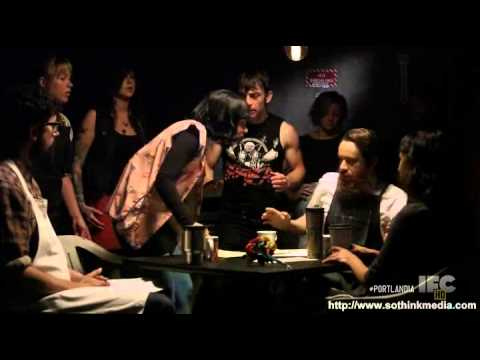

In [55]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [148]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [149]:

# Start here 
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [100]:
shops['full_review_text'].str[11:]

0        1 check-in Love love loved the atmosphere! Ev...
1       Listed in Date Night: Austin, Ambiance in Aust...
2        1 check-in Listed in Brunch Spots I loved the...
3        Very cool decor! Good drinks Nice seating  Ho...
4       1 check-in They are located within the Northcr...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    he food is just average. The booths didn't fee...
7615    I finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object

In [101]:
def listToString(list):
    str1 = " "
    return (str1.join(list))

In [66]:
import re
import numpy as np
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [70]:
sample = "11/25/2016 1 check-in Love love loved the atm"
tokens = tokenize(sample)
tokens

['11252016', '1', 'checkin', 'love', 'love', 'loved', 'the', 'atm']

In [150]:
def wrangle(df):
    df['star_rating'] = df['star_rating'].str.rstrip('star rating')
    df['star_rating'] = pd.to_numeric(df['star_rating'])

    df['full_review_text'] = df.full_review_text.str.split(" ")
    df['full_review_text']  = df['full_review_text'].str[2:]
    df['full_review_text'] = df['full_review_text'].apply(listToString)

    return df

In [151]:
df = wrangle(shops)
df.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0


In [188]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ', 'coffee', 'place', "i'm", "it's", 'good', 'like', "check-in", '-', '1' ])

In [189]:
tokens = []

for doc in tokenizer.pipe(df['full_review_text']):

    doc_tokens =[]

    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
df['tokens'] = tokens

In [180]:
df.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0,"[1, love, love, loved, atmosphere!, corner, sh..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0,"[1, listed, brunch, spots, loved, eclectic, ho..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[cool, decor!, drinks, nice, seating, however...."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0,"[1, located, northcross, mall, shopping, cente..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [190]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [191]:
from collections import Counter
def count(docs):

        #dict for word/ token counts
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        # build word count df to store words and their counts
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        # rank word counts by most used/appears in corpus
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
       
       # total number of toeksn
        total = wc['count'].sum()

        
        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [192]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
124,great,2438,3250,1.0,0.008865,0.008865,0.320116
20,love,1434,1806,2.0,0.004926,0.013791,0.188288
320,i've,1164,1479,3.0,0.004034,0.017825,0.152836
789,little,1230,1479,4.0,0.004034,0.021860,0.161502
299,don't,1133,1395,5.0,0.003805,0.025665,0.148766


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [194]:
mask = df['star_rating'] > 3.0

In [195]:
good_review = df[mask] 
bad_review = df[~mask]

In [196]:
bad_wc = count(bad_review['tokens'])
good_wc = count(good_review['tokens'])

In [197]:
print(bad_wc.head())
good_wc.head()

       word  appears_in  count  rank  pct_total  cul_pct_total  appears_in_pct
183   don't         340    430   1.0   0.005284       0.005284        0.230352
181    food         266    369   2.0   0.004534       0.009818        0.180217
232    time         264    351   3.0   0.004313       0.014131        0.178862
43   pretty         278    349   4.0   0.004288       0.018419        0.188347
128   great         264    348   5.0   0.004276       0.022695        0.178862


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
124,great,2174,2902,1.0,0.010174,0.010174,0.354072
20,love,1263,1604,2.0,0.005624,0.015798,0.205700
601,little,1027,1230,3.0,0.004312,0.020110,0.167264
292,i've,927,1167,4.0,0.004091,0.024201,0.150977
213,nice,962,1101,5.0,0.003860,0.028061,0.156678


In [198]:
import squarify
import matplotlib.pyplot as plt

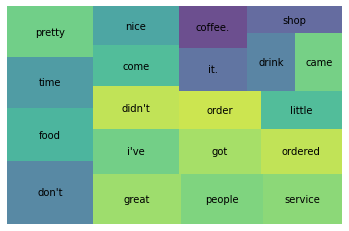

In [199]:
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]
squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'],
alpha=.8)
plt.axis('off')
plt.show()

In [ ]:
good_wc_top20 = good_wc[good_wc['rank'] <= 20]
squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

